In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

In [2]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax

array([[3.911329901200285, 'd13c_site1b_07_025.tif'],
       [3.7044257619201155, 'd13c_site1b_08_025.tif'],
       [3.019095380373206, 'd13c_site1b_08_027.tif'],
       [2.429221738415402, 'd13c_site1b_09_027.tif'],
       [3.299519187813184, 'd13c_site1b_10_028.tif'],
       [3.4507880876258024, 'd13c_site1b_10_031.tif'],
       [2.721752216651218, 'd13c_site1b_13_038.tif'],
       [3.9390254401008966, 'd13c_site1b_13_051.tif'],
       [2.8676694013847333, 'd13c_site1b_14_037.tif'],
       [5.195130289286747, 'd13c_site1b_15_056.tif'],
       [2.34140621178785, 'd13c_site1b_16_025.tif'],
       [4.224835685385168, 'd13c_site1b_16_057.tif'],
       [3.044048923133906, 'd13c_site1b_17_026.tif'],
       [4.244588529537586, 'd13c_site1b_17_029.tif'],
       [3.0527703999013345, 'd13c_site1b_17_042.tif'],
       [4.986442612416878, 'd13c_site1b_17_044.tif'],
       [3.3471935444174434, 'd13c_site1b_18_051.tif'],
       [3.7485181621598946, 'd13c_site1b_19_033.tif'],
       [3.360793294116

In [3]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)
    
    
    
    
# Item to be removed
item_to_remove = 'site6add_10_032.tif'

# Removing the item
if item_to_remove in site_name:
    site_name.remove(item_to_remove)

tiff_dir = r'E:\wenqu\aviris\single_pixel_clip_tif\combine'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_07_025.tif
site1b_08_025.tif
site1b_08_027.tif
site1b_09_027.tif
site1b_10_028.tif
site1b_10_031.tif
site1b_13_038.tif
site1b_13_051.tif
site1b_14_037.tif
site1b_15_056.tif
site1b_16_025.tif
site1b_16_057.tif
site1b_17_026.tif
site1b_17_029.tif
site1b_17_042.tif
site1b_17_044.tif
site1b_18_051.tif
site1b_19_033.tif
site1b_19_036.tif
site1b_21_035.tif
site1b_21_051.tif
site1b_21_052.tif
site1b_22_037.tif
site1b_23_038.tif
site1b_24_039.tif
site1b_25_026.tif
site1b_26_027.tif
site1b_26_039.tif
site1b_26_045.tif
site1b_26_046.tif
site1b_26_078.tif
site1b_27_046.tif
site1b_27_047.tif
site1b_27_048.tif
site1b_28_018.tif
site1b_29_016.tif
site1b_29_018.tif
site1b_30_018.tif
site1b_30_022.tif
site1b_30_036.tif
site1b_30_082.tif
site1b_30_083.tif
site1b_30_085.tif
site1b_32_086.tif
site1b_32_087.tif
site1b_33_024.tif
site1b_33_088.tif
site1b_34_022.tif
site1b_34_029.tif
site1b_34_045.tif
site1b_35_031.tif
site1b_35_089.tif
site1b_36_031.tif
site1b_36_032.tif
site1b_36_046.tif
site1b_36_

site6add_32_008.tif
site6add_33_007.tif
site6add_34_005.tif
site6add_34_006.tif
site6add_35_004.tif
site6add_35_005.tif


In [4]:
df_spectral = df.sort_values(by='filename')
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_07_025.tif,0.032935,0.018852,0.015076,0.017154,0.019138,0.022016,0.024114,0.024167,0.027301,...,0.023570,0.020351,0.025002,0.027706,0.023824,0.027307,0.051793,0.145811,0.075221,0.041778
1,site1b_08_025.tif,0.015530,0.012330,0.013138,0.011487,0.019282,0.016061,0.019116,0.019019,0.022247,...,0.026986,0.027582,0.024639,0.032859,0.026864,0.070102,0.076302,0.054107,0.096432,0.048397
2,site1b_08_027.tif,0.010203,0.011842,0.013479,0.011724,0.019912,0.015466,0.017308,0.019113,0.020695,...,0.058747,0.054097,0.048855,0.045194,0.049291,0.072694,0.098501,0.300149,0.144051,0.066305
3,site1b_09_027.tif,0.003565,0.008231,0.013388,0.010656,0.016043,0.017068,0.018333,0.020887,0.022433,...,0.033091,0.036671,0.035895,0.040650,0.043812,0.045004,0.139843,0.212881,0.126897,0.059120
4,site1b_10_028.tif,0.000970,0.004673,0.007931,0.009909,0.010849,0.014111,0.016204,0.018482,0.021874,...,0.032329,0.032874,0.033015,0.037952,0.030184,0.046781,0.064504,0.273074,0.116163,0.092072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,site6add_33_007.tif,0.031426,0.018642,0.023325,0.029619,0.027960,0.033256,0.032161,0.036436,0.035800,...,0.062880,0.063434,0.057355,0.061834,0.058450,0.080645,0.294588,0.306017,0.173580,0.103599
475,site6add_34_005.tif,0.048064,0.030280,0.028944,0.038268,0.031899,0.032196,0.032547,0.038597,0.037453,...,0.065528,0.065669,0.060744,0.062022,0.069963,0.065426,0.243186,0.286960,0.151281,0.101926
476,site6add_34_006.tif,0.014429,0.026514,0.022071,0.040430,0.031022,0.029400,0.030898,0.035135,0.036706,...,0.062401,0.061326,0.060185,0.069297,0.071238,0.077441,0.132074,0.294092,0.172386,0.122515
477,site6add_35_004.tif,0.033214,0.026766,0.031439,0.032909,0.037500,0.037047,0.037388,0.039283,0.040841,...,0.065486,0.061311,0.066779,0.077845,0.063198,0.102348,0.248795,0.285318,0.178591,0.095118


In [5]:
print(df_spectral['filename'])

0        site1b_07_025.tif
1        site1b_08_025.tif
2        site1b_08_027.tif
3        site1b_09_027.tif
4        site1b_10_028.tif
              ...         
474    site6add_33_007.tif
475    site6add_34_005.tif
476    site6add_34_006.tif
477    site6add_35_004.tif
478    site6add_35_005.tif
Name: filename, Length: 479, dtype: object


In [6]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [7]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [8]:
x_spectra.shape

(479, 319)

In [9]:
# vertically stack two section of arrays to create a new array
site1b_x = x_spectra[0:120, :]
site2a_x = x_spectra[120:240, :]
site2c_x = x_spectra[240:360,:]
site6_x1 = x_spectra[360:440,:]
site6_x1_1 = x_spectra[440:480,:]

x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1, site6_x1_1))
# site2c_x = x[]
x.shape

(479, 319)

In [10]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_d13c.npy',  allow_pickle=True)
# Custom sort order
sort_order = ['site1b', 'site2a', 'site2c', 'site6', 'site6add']

# Custom sort key function
def custom_sort(item):
    filename = item[1]
    for index, name in enumerate(sort_order):
        if name in filename:
            return index, filename
    return len(sort_order), filename

# Sorting the array
sorted_arr = sorted(d13c_trait_pdf_ymax, key=custom_sort)
sorted_arr

[array([3.911329901200285, 'd13c_site1b_07_025.tif'], dtype=object),
 array([3.7044257619201155, 'd13c_site1b_08_025.tif'], dtype=object),
 array([3.019095380373206, 'd13c_site1b_08_027.tif'], dtype=object),
 array([2.429221738415402, 'd13c_site1b_09_027.tif'], dtype=object),
 array([3.299519187813184, 'd13c_site1b_10_028.tif'], dtype=object),
 array([3.4507880876258024, 'd13c_site1b_10_031.tif'], dtype=object),
 array([2.721752216651218, 'd13c_site1b_13_038.tif'], dtype=object),
 array([3.9390254401008966, 'd13c_site1b_13_051.tif'], dtype=object),
 array([2.8676694013847333, 'd13c_site1b_14_037.tif'], dtype=object),
 array([5.195130289286747, 'd13c_site1b_15_056.tif'], dtype=object),
 array([2.34140621178785, 'd13c_site1b_16_025.tif'], dtype=object),
 array([4.224835685385168, 'd13c_site1b_16_057.tif'], dtype=object),
 array([3.044048923133906, 'd13c_site1b_17_026.tif'], dtype=object),
 array([4.244588529537586, 'd13c_site1b_17_029.tif'], dtype=object),
 array([3.0527703999013345, 'd1

In [11]:
sorted_arr = np.array(sorted_arr)

In [12]:
labels1 = [] 
for i in range(len(sorted_arr[:, 1])):
    substrings = sorted_arr[:, 1][i]
    print(substrings)
    site_name = substrings.split("_")[1]
    labels1.append(site_name)

d13c_site1b_07_025.tif
d13c_site1b_08_025.tif
d13c_site1b_08_027.tif
d13c_site1b_09_027.tif
d13c_site1b_10_028.tif
d13c_site1b_10_031.tif
d13c_site1b_13_038.tif
d13c_site1b_13_051.tif
d13c_site1b_14_037.tif
d13c_site1b_15_056.tif
d13c_site1b_16_025.tif
d13c_site1b_16_057.tif
d13c_site1b_17_026.tif
d13c_site1b_17_029.tif
d13c_site1b_17_042.tif
d13c_site1b_17_044.tif
d13c_site1b_18_051.tif
d13c_site1b_19_033.tif
d13c_site1b_19_036.tif
d13c_site1b_21_035.tif
d13c_site1b_21_051.tif
d13c_site1b_21_052.tif
d13c_site1b_22_037.tif
d13c_site1b_23_038.tif
d13c_site1b_24_039.tif
d13c_site1b_25_026.tif
d13c_site1b_26_027.tif
d13c_site1b_26_039.tif
d13c_site1b_26_045.tif
d13c_site1b_26_046.tif
d13c_site1b_26_078.tif
d13c_site1b_27_046.tif
d13c_site1b_27_047.tif
d13c_site1b_27_048.tif
d13c_site1b_28_018.tif
d13c_site1b_29_016.tif
d13c_site1b_29_018.tif
d13c_site1b_30_018.tif
d13c_site1b_30_022.tif
d13c_site1b_30_036.tif
d13c_site1b_30_082.tif
d13c_site1b_30_083.tif
d13c_site1b_30_085.tif
d13c_site1b

In [13]:
site1b_labels1 = labels1[0:120]
site2a_labels1 = labels1[120:240]
site2c_labels1 = labels1[240:360]
site6_labels1_1 = labels1[360:440]
site6_labels1_2 = labels1[441:480]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1 + site6_labels1_2
len(labels)

479

In [14]:
def plot_mse_vs_components(X, y, max_comp):
    """
    Plot the number of PLS components vs. MSE.
    
    Parameters:
    X (numpy.ndarray): Array of predictor variables.
    y (numpy.ndarray): Array of response variable.
    max_comp (int): Maximum number of PLS components to use.
    
    Returns:
    None
    """
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1]))
    component = np.arange(1, max_comp)

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y[:, 0].astype(np.float64))
#         print(pls1.coef_.shape)
        

#         # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
        
        
    

#         # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        print(Xc.shape)
#         break

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y[:, 0].astype(np.float64))
            y_cv = cross_val_predict(pls2, Xc[:, j:], y[:, 0].astype(np.float64), cv=5)
            mse[i, j] = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

        comp = 100 * (i+1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    mseminx, mseminy = np.where(mse == np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ", mseminy[0])
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")

    # Create plot of number of components vs. MSE
    fig, ax = plt.subplots()
    ax.plot(range(1, max_comp+1), mse[:, mseminy])
    ax.set_xlabel('Number of PLS components')
    ax.set_ylabel('MSE')
    ax.set_title('Number of PLS components vs. MSE')
    plt.show()
    
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y[:, 0].astype(np.float64))
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [15]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'},
            'site6add': {'marker': '^', 'color': 'red'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# d13c

In [24]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_d13c.npy',  allow_pickle=True)

In [25]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [26]:
y_d13c_max1.shape

(480, 2)

In [27]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:120, :]
site2a_y_d13c_max1 = y_d13c_max1[120:240, :]
site2c_y_d13c_max1 = y_d13c_max1[240:360,:]
site6_y_d13c_max1_1 = y_d13c_max1[360:440,:]
site6_y_d13c_max1_2 = y_d13c_max1[441:480,:]

y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1, site6_y_d13c_max1_2))
# site2c_x = x[]
y_d13c_max.shape

(479, 2)

In [29]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:120, :]
site2a_y_d13c_std1 = y_d13c_std1[120:240, :]
site2c_y_d13c_std1 = y_d13c_std1[240:360,:]
site6_y_d13c_std1_1 = y_d13c_std1[360:440,:]
site6_y_d13c_std1_2 = y_d13c_std1[441:480,:]

y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1,site6_y_d13c_std1_1, site6_y_d13c_std1_2))
# site2c_x = x[]
y_d13c_std.shape

(479, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  264
Optimised MSEP  0.6555328384043119



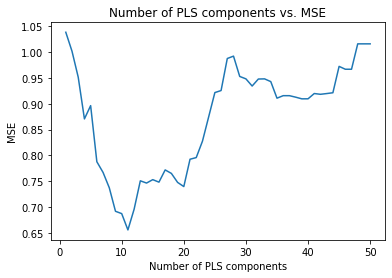

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [30]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(x, y_d13c_max, 50)


In [31]:
x1_d13c_max = opt_Xc_d13c_max[0:120,:]
x2_d13c_max = opt_Xc_d13c_max[120:240,:]
x3_d13c_max = opt_Xc_d13c_max[240:360,:]
x4_d13c_max = opt_Xc_d13c_max[360:480,:]

y1_d13c_max = y_d13c_max[0:120,:]
y2_d13c_max = y_d13c_max[120:240,:]
y3_d13c_max = y_d13c_max[240:360,:]
y4_d13c_max = y_d13c_max[360:480,:]

R2 calib: 0.547
R2 CV: 0.383
MSE calib: 0.463
MSE CV: 0.630
[-15.14435374] [0.47038226]
None
0 site1b [-29.31514468] [-30.230905920416266 'd13c_site1b_07_025.tif']
1 site1b [-29.31104603] [-30.592398625355703 'd13c_site1b_08_025.tif']
2 site1b [-29.90382711] [-29.720616542063915 'd13c_site1b_08_027.tif']
3 site1b [-29.64606619] [-29.58365178227544 'd13c_site1b_09_027.tif']
4 site1b [-29.01386634] [-30.12274311970662 'd13c_site1b_10_028.tif']
5 site1b [-29.01851179] [-30.086367048658765 'd13c_site1b_10_031.tif']
6 site1b [-29.55179632] [-29.444423434970616 'd13c_site1b_13_038.tif']
7 site1b [-28.79277852] [-28.129259653635568 'd13c_site1b_13_051.tif']
8 site1b [-29.4096983] [-29.25636508777454 'd13c_site1b_14_037.tif']
9 site1b [-28.14255359] [-28.913731709614886 'd13c_site1b_15_056.tif']
10 site1b [-28.30082284] [-29.62713300955069 'd13c_site1b_16_025.tif']
11 site1b [-28.03473515] [-28.308482524272318 'd13c_site1b_16_057.tif']
12 site1b [-28.47107844] [-28.597765386999548 'd13c_site1b

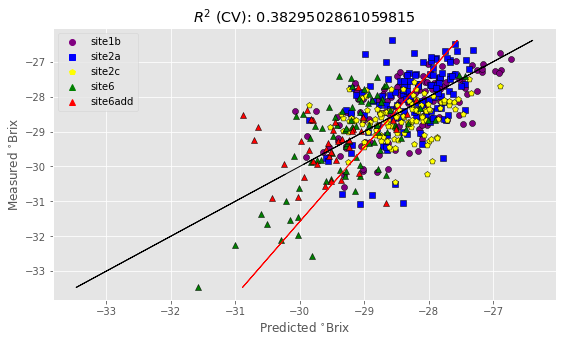

In [32]:
file_name_d13c_mean = 'E:/wenqu/model_csv_point/d13c_mean_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

# d13 std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  305
Optimised MSEP  3.598198451085422



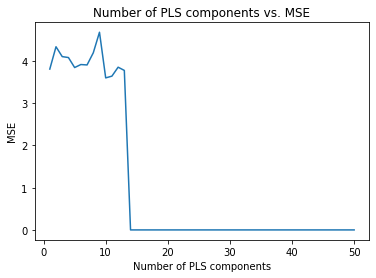

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [33]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 50)

In [34]:
x1_d13c_std = opt_Xc_d13c_std[0:120,:]
x2_d13c_std = opt_Xc_d13c_std[120:240,:]
x3_d13c_std = opt_Xc_d13c_std[240:360,:]
x4_d13c_std = opt_Xc_d13c_std[360:480,:]

y1_d13c_std = y_d13c_std[0:120,:]
y2_d13c_std = y_d13c_std[120:240,:]
y3_d13c_std = y_d13c_std[240:360,:]
y4_d13c_std = y_d13c_std[360:480,:]

R2 calib: 0.401
R2 CV: 0.190
MSE calib: 2.577
MSE CV: 3.481
[3.88122283] [0.29944719]
None
0 site1b [6.09431092] [3.911329901200285 'd13c_site1b_07_025.tif']
1 site1b [6.14967441] [3.7044257619201155 'd13c_site1b_08_025.tif']
2 site1b [4.20973521] [3.019095380373206 'd13c_site1b_08_027.tif']
3 site1b [2.32892973] [2.429221738415402 'd13c_site1b_09_027.tif']
4 site1b [3.29528528] [3.299519187813184 'd13c_site1b_10_028.tif']
5 site1b [3.41283674] [3.4507880876258024 'd13c_site1b_10_031.tif']
6 site1b [3.7774994] [2.721752216651218 'd13c_site1b_13_038.tif']
7 site1b [3.56731707] [3.9390254401008966 'd13c_site1b_13_051.tif']
8 site1b [3.2677269] [2.8676694013847333 'd13c_site1b_14_037.tif']
9 site1b [4.60313371] [5.195130289286747 'd13c_site1b_15_056.tif']
10 site1b [3.0020396] [2.34140621178785 'd13c_site1b_16_025.tif']
11 site1b [5.37209508] [4.224835685385168 'd13c_site1b_16_057.tif']
12 site1b [3.88965921] [3.044048923133906 'd13c_site1b_17_026.tif']
13 site1b [3.43384615] [4.244588529

465 site6add [5.75021675] [3.3096141428480816 'd13c_site6add_27_013.tif']
466 site6add [5.75021675] [2.8014437185345895 'd13c_site6add_27_014.tif']
467 site6add [6.67466375] [3.8000335179800415 'd13c_site6add_28_012.tif']
468 site6add [6.59967121] [4.662836361647068 'd13c_site6add_29_011.tif']
469 site6add [6.96646971] [3.8409611861926116 'd13c_site6add_30_010.tif']
470 site6add [6.01601713] [3.217301742551076 'd13c_site6add_31_008.tif']
471 site6add [6.18455016] [4.5420501915852185 'd13c_site6add_31_009.tif']
472 site6add [7.29448363] [3.5116576461568183 'd13c_site6add_32_007.tif']
473 site6add [6.49910253] [3.9258500797542473 'd13c_site6add_32_008.tif']
474 site6add [6.69636823] [2.8997912661144154 'd13c_site6add_33_007.tif']
475 site6add [6.1372716] [3.132206717018319 'd13c_site6add_34_005.tif']
476 site6add [6.57131268] [2.754043837121823 'd13c_site6add_34_006.tif']
477 site6add [6.55895379] [3.5305782462547115 'd13c_site6add_35_004.tif']
478 site6add [6.68427292] [4.40169085390192

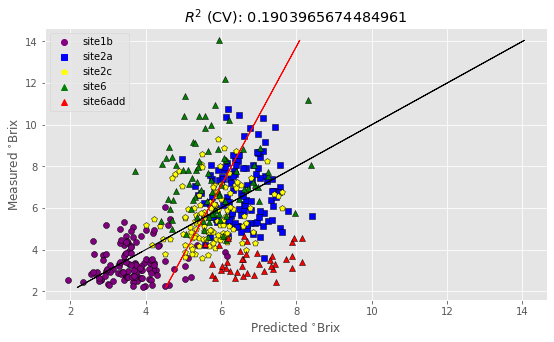

In [35]:
file_name_d13c_std = 'E:/wenqu/model_csv_point/d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

# d15n

In [40]:
d15n_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_d15n.npy',  allow_pickle=True)

In [41]:
y_d15n_max1 = np.array(d15n_trait_pdf_ymax)
y_d15n_std1 = np.array(d15n_trait_pdf_std)

In [42]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max1 = y_d15n_max1[0:120, :]
site2a_y_d15n_max1 = y_d15n_max1[120:240, :]
site2c_y_d15n_max1 = y_d15n_max1[240:360,:]
site6_y_d15n_max1_1 = y_d15n_max1[360:440,:]
site6_y_d15n_max1_2 = y_d15n_max1[441:480,:]

y_d15n_max = np.vstack((site1b_y_d15n_max1, site2a_y_d15n_max1,site2c_y_d15n_max1,site6_y_d15n_max1_1, site6_y_d15n_max1_2))
# site2c_x = x[]
y_d15n_max.shape

(479, 2)

In [43]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std1 = y_d15n_std1[0:120, :]
site2a_y_d15n_std1 = y_d15n_std1[120:240, :]
site2c_y_d15n_std1 = y_d15n_std1[240:360,:]
site6_y_d15n_std1_1 = y_d15n_std1[360:440,:]
site6_y_d15n_std1_2 = y_d15n_std1[441:480,:]
y_d15n_std = np.vstack((site1b_y_d15n_std1, site2a_y_d15n_std1,site2c_y_d15n_std1,site6_y_d15n_std1_1, site6_y_d15n_std1_2))
# site2c_x = x[]
y_d15n_std.shape

(479, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  271
Optimised MSEP  5.147114252341491



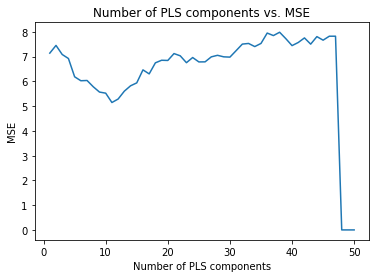

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [44]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(x, y_d15n_max, 50)
x1_d15n_max = opt_Xc_d15n_max[0:120,:]
x2_d15n_max = opt_Xc_d15n_max[120:240,:]
x3_d15n_max = opt_Xc_d15n_max[240:360,:]
x4_d15n_max = opt_Xc_d15n_max[360:480,:]

y1_d15n_max = y_d15n_max[0:120,:]
y2_d15n_max = y_d15n_max[120:240,:]
y3_d15n_max = y_d15n_max[240:360,:]
y4_d15n_max = y_d15n_max[360:480,:]

R2 calib: 0.634
R2 CV: 0.545
MSE calib: 4.042
MSE CV: 5.030
[-1.20257087] [0.56955237]
None
0 site1b [-0.43804344] [6.046873787621241 'd15n_site1b_07_025.tif']
1 site1b [-1.99580829] [5.893403762572998 'd15n_site1b_08_025.tif']
2 site1b [-1.32854557] [2.2210496104396036 'd15n_site1b_08_027.tif']
3 site1b [0.68438799] [1.8868199120293383 'd15n_site1b_09_027.tif']
4 site1b [2.7828175] [5.826688005640223 'd15n_site1b_10_028.tif']
5 site1b [2.02959233] [2.658159649288571 'd15n_site1b_10_031.tif']
6 site1b [-1.13923971] [3.112956039421075 'd15n_site1b_13_038.tif']
7 site1b [-4.74369069] [-9.765359674249446 'd15n_site1b_13_051.tif']
8 site1b [-0.61796381] [2.1270929876867832 'd15n_site1b_14_037.tif']
9 site1b [-0.06547333] [1.9813313508057604 'd15n_site1b_15_056.tif']
10 site1b [-1.87558338] [-1.205536624690792 'd15n_site1b_16_025.tif']
11 site1b [1.93882521] [-1.7194814366979259 'd15n_site1b_16_057.tif']
12 site1b [-1.93430825] [-2.393123362754082 'd15n_site1b_17_026.tif']
13 site1b [0.9969

470 site6add [-3.65062777] [-4.161237544841594 'd15n_site6add_31_008.tif']
471 site6add [-4.41934163] [-4.402204691110789 'd15n_site6add_31_009.tif']
472 site6add [-6.22945748] [-5.428151489616752 'd15n_site6add_32_007.tif']
473 site6add [-5.69409065] [-4.580818196316738 'd15n_site6add_32_008.tif']
474 site6add [-4.22560549] [-4.884182004957228 'd15n_site6add_33_007.tif']
475 site6add [-6.5663606] [-5.977939783273873 'd15n_site6add_34_005.tif']
476 site6add [-5.12675802] [-5.315759263597094 'd15n_site6add_34_006.tif']
477 site6add [-6.55629896] [-5.8680417458932315 'd15n_site6add_35_004.tif']
478 site6add [-7.37805996] [-5.48971345403173 'd15n_site6add_35_005.tif']


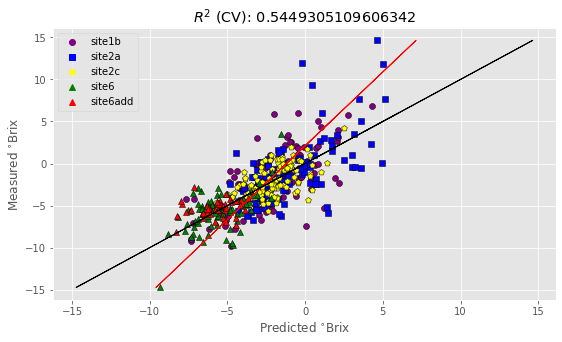

In [45]:
file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  306
Optimised MSEP  8.09912938403461



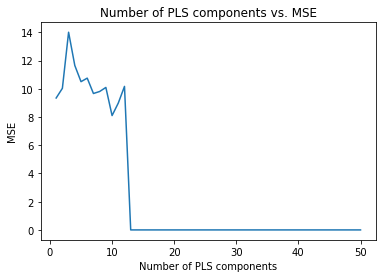

R2 calib: 0.418
R2 CV: 0.260
MSE calib: 5.895
MSE CV: 7.498
[6.52493491] [0.3138008]
None
0 site1b [15.08762084] [10.745183456613608 'd15n_site1b_07_025.tif']
1 site1b [13.74707958] [7.220580557323889 'd15n_site1b_08_025.tif']
2 site1b [8.91320698] [8.418159359051469 'd15n_site1b_08_027.tif']
3 site1b [8.27132355] [7.535068775301616 'd15n_site1b_09_027.tif']
4 site1b [7.97422068] [6.339702792016695 'd15n_site1b_10_028.tif']
5 site1b [7.60148755] [9.906177832510993 'd15n_site1b_10_031.tif']
6 site1b [8.53247114] [7.543947606822399 'd15n_site1b_13_038.tif']
7 site1b [6.99894282] [9.032225949865838 'd15n_site1b_13_051.tif']
8 site1b [5.68174674] [6.5288713833497924 'd15n_site1b_14_037.tif']
9 site1b [7.55493587] [11.10216048934989 'd15n_site1b_15_056.tif']
10 site1b [8.27702166] [5.553143769006167 'd15n_site1b_16_025.tif']
11 site1b [12.35931065] [15.153681350380053 'd15n_site1b_16_057.tif']
12 site1b [9.21549117] [8.939139590155872 'd15n_site1b_17_026.tif']
13 site1b [5.83051105] [8.0669

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 site2a [11.50470359] [9.052826194835363 'd15n_site2a_23_029.tif']
184 site2a [13.91182053] [17.271025140911924 'd15n_site2a_23_031.tif']
185 site2a [15.00213763] [13.858160926732355 'd15n_site2a_23_032.tif']
186 site2a [11.88748099] [16.271737579232674 'd15n_site2a_24_013.tif']
187 site2a [10.59861649] [15.968033535621098 'd15n_site2a_24_015.tif']
188 site2a [9.99348987] [11.42133848524812 'd15n_site2a_24_016.tif']
189 site2a [10.29708018] [17.301173870730874 'd15n_site2a_24_024.tif']
190 site2a [10.43472168] [18.375476384093062 'd15n_site2a_24_025.tif']
191 site2a [9.04683262] [16.784294646215024 'd15n_site2a_24_026.tif']
192 site2a [10.87626175] [7.200977696226663 'd15n_site2a_24_030.tif']
193 site2a [14.46185796] [21.3653214173022 'd15n_site2a_24_032.tif']
194 site2a [9.34390073] [10.99874948075753 'd15n_site2a_26_013.tif']
195 site2a [10.52026526] [11.536278278615676 'd15n_site2a_26_017.tif']
196 site2a [11.21318282] [16.82454714954892 'd15n_site2a_26_018.tif']
197 site2a [11.8430

460 site6add [8.62461866] [7.121693566784881 'd15n_site6add_24_017.tif']
461 site6add [9.00032122] [6.639849302319865 'd15n_site6add_25_015.tif']
462 site6add [7.4651523] [5.560890872622672 'd15n_site6add_25_016.tif']
463 site6add [10.17393868] [6.909788522585015 'd15n_site6add_26_014.tif']
464 site6add [8.96917773] [6.340088876096295 'd15n_site6add_26_015.tif']
465 site6add [11.55046262] [7.497517758214908 'd15n_site6add_27_013.tif']
466 site6add [11.55046262] [7.821458284494035 'd15n_site6add_27_014.tif']
467 site6add [8.30314493] [7.181712830935023 'd15n_site6add_28_012.tif']
468 site6add [8.63324763] [9.349794435366563 'd15n_site6add_29_011.tif']
469 site6add [9.92547535] [5.945922315060894 'd15n_site6add_30_010.tif']
470 site6add [10.98678433] [8.957511102082028 'd15n_site6add_31_008.tif']
471 site6add [8.17050845] [9.227482254890162 'd15n_site6add_31_009.tif']
472 site6add [9.31818959] [9.28427684890652 'd15n_site6add_32_007.tif']
473 site6add [10.68334644] [9.543853769513133 'd1

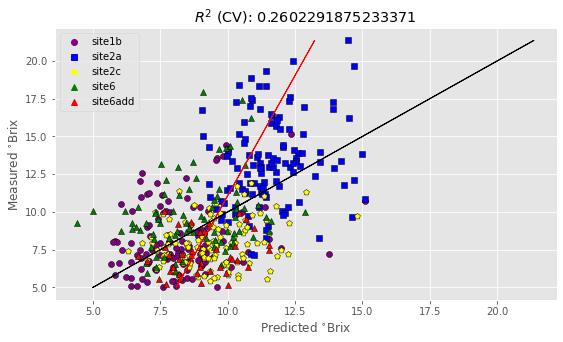

In [47]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

x1_d15n_std = opt_Xc_d15n_std[0:120,:]
x2_d15n_std = opt_Xc_d15n_std[120:240,:]
x3_d15n_std = opt_Xc_d15n_std[240:360,:]
x4_d15n_std = opt_Xc_d15n_std[360:480,:]

y1_d15n_std = y_d15n_std[0:120,:]
y2_d15n_std = y_d15n_std[120:240,:]
y3_d15n_std = y_d15n_std[240:360,:]
y4_d15n_std = y_d15n_std[360:480,:]


file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

# LA

In [48]:
la_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_la.npy',  allow_pickle=True)

In [49]:
y_la_max1 = np.array(la_trait_pdf_ymax)

y_la_std1 = np.array(la_trait_pdf_std)

In [50]:
y_la_max1.shape

(480, 2)

In [51]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max1 = y_la_max1[0:120, :]
site2a_y_la_max1 = y_la_max1[120:240, :]
site2c_y_la_max1 = y_la_max1[240:360,:]
site6_y_la_max1_1 = y_la_max1[360:440,:]
site6_y_la_max1_2 = y_la_max1[441:480,:]
y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1, site6_y_la_max1_2))
# site2c_x = x[]
y_la_max.shape

(479, 2)

In [52]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std1 = y_la_std1[0:120, :]
site2a_y_la_std1 = y_la_std1[120:240, :]
site2c_y_la_std1 = y_la_std1[240:360,:]
site6_y_la_std1_1 = y_la_std1[360:440,:]
site6_y_la_std1_2 = y_la_std1[441:480,:]
y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1, site6_y_la_std1_2))
# site2c_x = x[]
y_la_std.shape

(479, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  17
Wavelengths to be discarded  282
Optimised MSEP  1.629502567930077



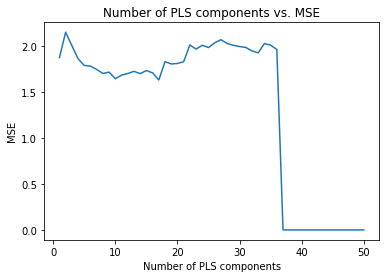

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.367
R2 CV: 0.216
MSE calib: 1.282
MSE CV: 1.588
[1.4167552] [0.30631751]
None
0 site1b [1.65187957] [-1.1950389558488546 'la_site1b_07_025.tif']
1 site1b [0.93651995] [-3.1648005312746825 'la_site1b_08_025.tif']
2 site1b [2.86975713] [0.0750248277032215 'la_site1b_08_027.tif']
3 site1b [2.02736995] [0.20188671833760097 'la_site1b_09_027.tif']
4 site1b [0.52786427] [-3.3766987073170887 'la_site1b_10_028.tif']
5 site1b [1.74197645] [0.33549566574402157 'la_site1b_10_031.tif']
6 site1b [1.75263306] [0.3555550164765906 'la_site1b_13_038.tif']
7 site1b [1.9789138] [4.522875106131827 'la_site1b_13_051.tif']
8 site1b [0.76606035] [0.6730998736602052 'la_site1b_14_037.tif']
9 site1b [-1.80436171] [-3.4810694922675367 'la_site1b_15_056.tif']
10 site1b [1.83371063] [2.4452229348030894 'la_site1b_16_025.tif']
11 site1b [0.66377813] [-0.17850826166055533 'la_site1b_16_057.tif']
12 site1b [2.00916032] [2.972884447366984 'la_site1b_17_026.tif']
13 site1b [2.45273543] [0.7697129822350117 

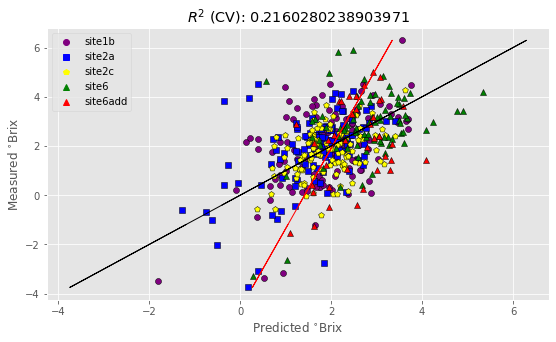

In [53]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 50)
x1_la_max = opt_Xc_la_max[0:120,:]
x2_la_max = opt_Xc_la_max[120:240,:]
x3_la_max = opt_Xc_la_max[240:360,:]
x4_la_max = opt_Xc_la_max[360:480,:]

y1_la_max = y_la_max[0:120,:]
y2_la_max = y_la_max[120:240,:]
y3_la_max = y_la_max[240:360,:]
y4_la_max = y_la_max[360:480,:]
file_name_la_max = 'E:/wenqu/model_csv_point/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  249
Optimised MSEP  2.7052608164227814



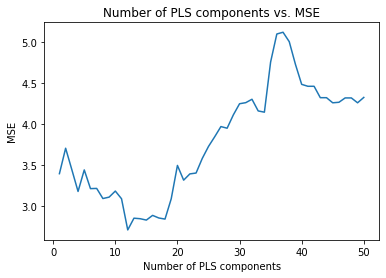

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.570
R2 CV: 0.379
MSE calib: 1.621
MSE CV: 2.343
[3.42845344] [0.4597443]
None
0 site1b [6.34611989] [4.9726367307468 'la_site1b_07_025.tif']
1 site1b [5.68584918] [3.4842528415202882 'la_site1b_08_025.tif']
2 site1b [4.69132587] [5.50929649495397 'la_site1b_08_027.tif']
3 site1b [2.82757562] [3.234062090614721 'la_site1b_09_027.tif']
4 site1b [4.5332028] [3.8942968691989073 'la_site1b_10_028.tif']
5 site1b [4.77750321] [5.046559706580052 'la_site1b_10_031.tif']
6 site1b [7.32358636] [4.009590504078388 'la_site1b_13_038.tif']
7 site1b [5.83700827] [6.316905712099596 'la_site1b_13_051.tif']
8 site1b [4.6573161] [5.012023714042866 'la_site1b_14_037.tif']
9 site1b [7.48823784] [5.926440776958701 'la_site1b_15_056.tif']
10 site1b [3.74794026] [2.9776230332289244 'la_site1b_16_025.tif']
11 site1b [7.56830196] [8.776797435178036 'la_site1b_16_057.tif']
12 site1b [6.09575113] [4.02338515596528 'la_site1b_17_026.tif']
13 site1b [4.17659961] [4.086033773951596 'la_site1b_17_029.tif']

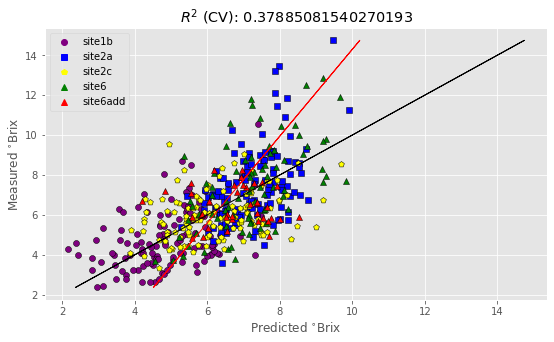

In [54]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 50)

x1_la_std = opt_Xc_la_std[0:120,:]
x2_la_std = opt_Xc_la_std[120:240,:]
x3_la_std = opt_Xc_la_std[240:360,:]
x4_la_std = opt_Xc_la_std[360:480,:]

y1_la_std = y_la_std[0:120,:]
y2_la_std = y_la_std[120:240,:]
y3_la_std = y_la_std[240:360,:]
y4_la_std = y_la_std[360:480,:]
file_name_la_std = 'E:/wenqu/model_csv_point/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

# SLA

In [55]:
sla_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_sla.npy',  allow_pickle=True)

In [56]:
y_sla_max1 = np.array(sla_trait_pdf_ymax)
y_sla_std1 = np.array(sla_trait_pdf_std)

In [57]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max1 = y_sla_max1[0:120, :]
site2a_y_sla_max1 = y_sla_max1[120:240, :]
site2c_y_sla_max1 = y_sla_max1[240:360,:]
site6_y_sla_max1_1 = y_sla_max1[360:440,:]
site6_y_sla_max1_2 = y_sla_max1[441:480,:]
y_sla_max = np.vstack((site1b_y_sla_max1, site2a_y_sla_max1,site2c_y_sla_max1,site6_y_sla_max1_1, site6_y_sla_max1_2))
# site2c_x = x[]
y_sla_max.shape

(479, 2)

In [58]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std1 = y_sla_std1[0:120, :]
site2a_y_sla_std1 = y_sla_std1[120:240, :]
site2c_y_sla_std1 = y_sla_std1[240:360,:]
site6_y_sla_std1_1 = y_sla_std1[360:440,:]
site6_y_sla_std1_2 = y_sla_std1[441:480,:]
y_sla_std = np.vstack((site1b_y_sla_std1, site2a_y_sla_std1,site2c_y_sla_std1,site6_y_sla_std1_1, site6_y_sla_std1_2))
# site2c_x = x[]
y_sla_std.shape

(479, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  227
Optimised MSEP  0.03294354955956604



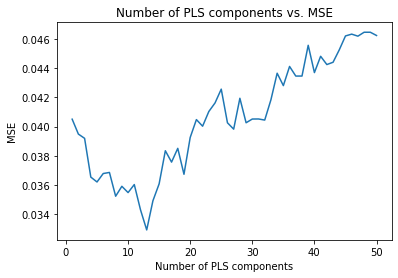

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.637
R2 CV: 0.409
MSE calib: 0.021
MSE CV: 0.034
[2.21820223] [0.51836467]
None
0 site1b [4.33739935] [4.343369006394624 'sla_site1b_07_025.tif']
1 site1b [4.68107157] [3.9726552431051196 'sla_site1b_08_025.tif']
2 site1b [4.49214652] [4.305167535642484 'sla_site1b_08_027.tif']
3 site1b [4.15921281] [4.3098675853855255 'sla_site1b_09_027.tif']
4 site1b [4.23641665] [4.061498998521684 'sla_site1b_10_028.tif']
5 site1b [4.44937671] [4.414819808335634 'sla_site1b_10_031.tif']
6 site1b [4.38251134] [4.30161714553833 'sla_site1b_13_038.tif']
7 site1b [4.83417077] [5.112153313181421 'sla_site1b_13_051.tif']
8 site1b [4.28745409] [4.23713188247757 'sla_site1b_14_037.tif']
9 site1b [4.39242133] [4.361165943804446 'sla_site1b_15_056.tif']
10 site1b [4.41051047] [4.26957402358184 'sla_site1b_16_025.tif']
11 site1b [4.52479848] [4.604085768307294 'sla_site1b_16_057.tif']
12 site1b [4.43559786] [4.384306801689996 'sla_site1b_17_026.tif']
13 site1b [4.44672692] [4.216183400726891 'sla_si

408 site6 [4.7165562] [4.676959885491265 'sla_site6_46_019.tif']
409 site6 [4.93712023] [4.871546152475718 'sla_site6_47_016.tif']
410 site6 [4.77544587] [4.830386356071189 'sla_site6_47_018.tif']
411 site6 [4.6307871] [4.75379544478637 'sla_site6_48_014.tif']
412 site6 [4.6463479] [4.604212161656973 'sla_site6_48_015.tif']
413 site6 [4.69633272] [4.735797018140882 'sla_site6_48_016.tif']
414 site6 [4.63915406] [4.656685908874115 'sla_site6_48_017.tif']
415 site6 [4.62662899] [4.7277013513299675 'sla_site6_49_013.tif']
416 site6 [4.72543819] [4.722378943417524 'sla_site6_49_014.tif']
417 site6 [4.81620217] [4.888937227480166 'sla_site6_49_015.tif']
418 site6 [4.80299586] [4.490773342273854 'sla_site6_49_016.tif']
419 site6 [4.74934972] [4.653672311399076 'sla_site6_50_013.tif']
420 site6 [4.76236135] [4.858023836806014 'sla_site6_50_014.tif']
421 site6 [4.74844345] [4.751764056918858 'sla_site6_50_015.tif']
422 site6 [4.84074184] [4.900631890998588 'sla_site6_51_012.tif']
423 site6 [5.

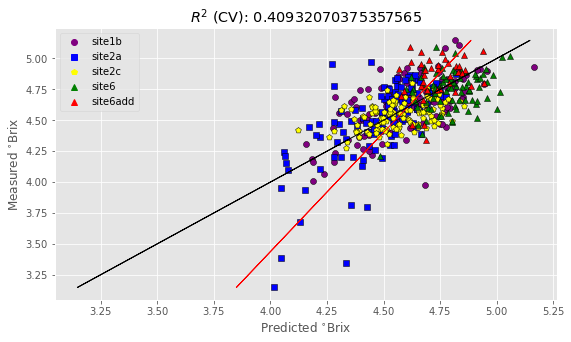

In [60]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 50)
x1_sla_max = opt_Xc_sla_max[0:120,:]
x2_sla_max = opt_Xc_sla_max[120:240,:]
x3_sla_max = opt_Xc_sla_max[240:360,:]
x4_sla_max = opt_Xc_sla_max[360:480,:]

y1_sla_max = y_sla_max[0:120,:]
y2_sla_max = y_sla_max[120:240,:]
y3_sla_max = y_sla_max[240:360,:]
y4_sla_max = y_sla_max[360:480,:]
file_name_sla_max = 'E:/wenqu/model_csv_point/sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

In [85]:
band_name = np.array(band_name)

In [87]:
optimal_pls_sla  = PLSRegression(n_components=11)
optimal_pls_sla.fit(opt_Xc_sla_max, y_sla_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_max][wav_sla_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(68,) (68,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.08172372,  0.24517703,  0.48172983, -0.23243205,  0.10111044,
        0.54289691, -0.12697045,  0.08452502,  0.04592373,  0.44246718,
       -0.32555888, -0.34150563,  0.28816751,  0.21392955,  0.15988314,
       -0.380654  , -0.32344654, -0.13001747,  0.2925615 , -0.33941894,
       -0.28076863,  0.17853602, -0.07598086,  0.36000095, -0.28903048,
       -0.27205175, -0.00136494, -0.01550821, -0.31341499, -0.27559418,
        0.21408723, -0.37191312,  0.22120895, -0.18999355, -0.2191986 ,
        0.26315927,  0.03666206,  0.29687882, -0.22014717,  0.1435495 ,
        0.34527593,  0.30287965,  0.13393886,  0.15455908, -0.28286186,
        0.26437047, -0.26410121, -0.0615298 , -0.32698073,  0.38666499,
       -0.18738171, -0.16781797, -0.15121249, -0.32341369,  0.1761836 ,
        0.33758846,  0.25548594, -0.13905386, -0.45704211,  0.28118616,
       -0.26114927, -0.29053823,  0.44148748,  0.17773748, -0.29812526,
        0.30524208, -0.46386094,  0.2834915 ])

In [88]:
optimal_pls_sla.intercept_

array([4.60752528])

In [89]:
bands_sla

array(['band_221', 'band_340', 'band_260', 'band_119', 'band_329',
       'band_270', 'band_85', 'band_123', 'band_284', 'band_125',
       'band_230', 'band_232', 'band_248', 'band_40', 'band_331',
       'band_236', 'band_143', 'band_93', 'band_179', 'band_338',
       'band_242', 'band_217', 'band_63', 'band_223', 'band_373',
       'band_135', 'band_134', 'band_153', 'band_339', 'band_378',
       'band_43', 'band_177', 'band_47', 'band_113', 'band_24',
       'band_393', 'band_154', 'band_102', 'band_285', 'band_401',
       'band_184', 'band_183', 'band_124', 'band_19', 'band_22',
       'band_70', 'band_389', 'band_61', 'band_355', 'band_336',
       'band_384', 'band_62', 'band_170', 'band_376', 'band_216',
       'band_69', 'band_100', 'band_155', 'band_84', 'band_394',
       'band_36', 'band_72', 'band_399', 'band_17', 'band_174', 'band_27',
       'band_44', 'band_114'], dtype='<U8')

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  239
Optimised MSEP  0.06836224749739961



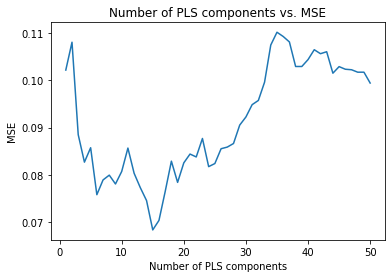

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.703
R2 CV: 0.496
MSE calib: 0.038
MSE CV: 0.064
[0.4123545] [0.60224315]
None
0 site1b [0.90963084] [0.8205127891814227 'sla_site1b_07_025.tif']
1 site1b [0.77859954] [0.7633147497028729 'sla_site1b_08_025.tif']
2 site1b [0.46149961] [0.6200798296858191 'sla_site1b_08_027.tif']
3 site1b [0.53411648] [0.6349458580041624 'sla_site1b_09_027.tif']
4 site1b [0.85203384] [0.5782741715534748 'sla_site1b_10_028.tif']
5 site1b [0.67857519] [0.7032298981073742 'sla_site1b_10_031.tif']
6 site1b [1.04955619] [0.4681407253895559 'sla_site1b_13_038.tif']
7 site1b [0.79685779] [0.685439165765626 'sla_site1b_13_051.tif']
8 site1b [0.89618513] [0.5745911471403211 'sla_site1b_14_037.tif']
9 site1b [1.31088303] [0.9689364890798187 'sla_site1b_15_056.tif']
10 site1b [0.80908674] [0.4431616917099669 'sla_site1b_16_025.tif']
11 site1b [1.18298219] [0.9084280748645167 'sla_site1b_16_057.tif']
12 site1b [0.79311691] [0.8747053115342532 'sla_site1b_17_026.tif']
13 site1b [0.39798295] [0.84236026347

457 site6add [1.63540211] [0.9375026035826276 'sla_site6add_23_017.tif']
458 site6add [1.54469879] [1.1234543098463552 'sla_site6add_23_018.tif']
459 site6add [1.49407176] [1.3714240438785947 'sla_site6add_24_016.tif']
460 site6add [1.34110007] [1.0832467256452016 'sla_site6add_24_017.tif']
461 site6add [1.11056665] [1.180412872476103 'sla_site6add_25_015.tif']
462 site6add [1.40110469] [0.9224470468376286 'sla_site6add_25_016.tif']
463 site6add [1.11358169] [0.8161038936293217 'sla_site6add_26_014.tif']
464 site6add [1.2622494] [1.2647524022885015 'sla_site6add_26_015.tif']
465 site6add [1.01278141] [1.2488945705422647 'sla_site6add_27_013.tif']
466 site6add [1.01278141] [0.9129168189976771 'sla_site6add_27_014.tif']
467 site6add [0.94489299] [1.0302894794428388 'sla_site6add_28_012.tif']
468 site6add [1.38530016] [1.4279903908293345 'sla_site6add_29_011.tif']
469 site6add [1.27914261] [0.9472041028397604 'sla_site6add_30_010.tif']
470 site6add [1.25552148] [0.9656856390833902 'sla_si

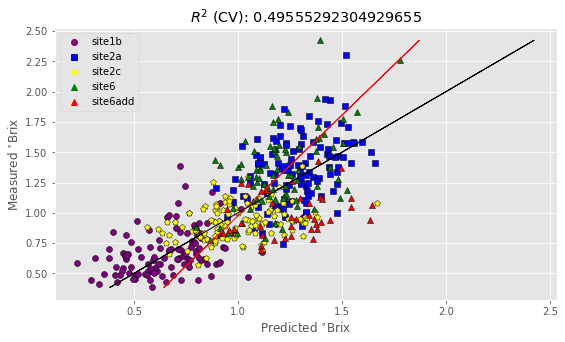

In [61]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 50)

x1_sla_std = opt_Xc_sla_std[0:120,:]
x2_sla_std = opt_Xc_sla_std[120:240,:]
x3_sla_std = opt_Xc_sla_std[240:360,:]
x4_sla_std = opt_Xc_sla_std[360:480,:]

y1_sla_std = y_sla_std[0:120,:]
y2_sla_std = y_sla_std[120:240,:]
y3_sla_std = y_sla_std[240:360,:]
y4_sla_std = y_sla_std[360:480,:]
file_name_sla_std = 'E:/wenqu/model_csv_point/sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

# LDMC

In [62]:
ldmc_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_ldmc.npy',  allow_pickle=True)

In [63]:

y_ldmc_max1 = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std1 = np.array(ldmc_trait_pdf_std)

In [64]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max1 = y_ldmc_max1[0:120, :]
site2a_y_ldmc_max1 = y_ldmc_max1[120:240, :]
site2c_y_ldmc_max1 = y_ldmc_max1[240:360,:]
site6_y_ldmc_max1_1 = y_ldmc_max1[360:440,:]
site6_y_ldmc_max1_2 = y_ldmc_max1[441:480,:]
y_ldmc_max = np.vstack((site1b_y_ldmc_max1, site2a_y_ldmc_max1,site2c_y_ldmc_max1,site6_y_ldmc_max1_1, site6_y_ldmc_max1_2))
# site2c_x = x[]
y_ldmc_max.shape

(479, 2)

In [65]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std1 = y_ldmc_std1[0:120, :]
site2a_y_ldmc_std1 = y_ldmc_std1[120:240, :]
site2c_y_ldmc_std1 = y_ldmc_std1[240:360,:]
site6_y_ldmc_std1_1 = y_ldmc_std1[360:440,:]
site6_y_ldmc_std1_2 = y_ldmc_std1[441:480,:]
y_ldmc_std = np.vstack((site1b_y_ldmc_std1, site2a_y_ldmc_std1,site2c_y_ldmc_std1,site6_y_ldmc_std1_1, site6_y_ldmc_std1_2))
# site2c_x = x[]
y_ldmc_std.shape

(479, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  240
Optimised MSEP  0.267963099157313



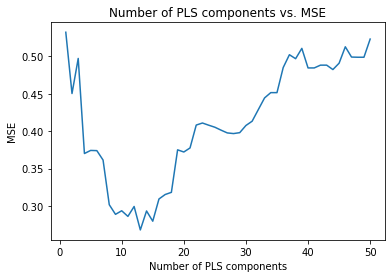

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.676
R2 CV: 0.349
MSE calib: 0.159
MSE CV: 0.321
[-0.27348217] [0.53826001]
None
0 site1b [-1.49340154] [-1.7136288437399418 'ldmc_site1b_07_025.tif']
1 site1b [-1.54874299] [-1.8168296937469965 'ldmc_site1b_08_025.tif']
2 site1b [0.03152698] [-1.0741107719199912 'ldmc_site1b_08_027.tif']
3 site1b [-0.65403322] [-1.1835916708181573 'ldmc_site1b_09_027.tif']
4 site1b [-1.47370758] [-1.5105767067488252 'ldmc_site1b_10_028.tif']
5 site1b [-1.0049493] [-1.0475946611112303 'ldmc_site1b_10_031.tif']
6 site1b [-0.41524229] [-0.7450498250631004 'ldmc_site1b_13_038.tif']
7 site1b [0.34338056] [1.4389087094200983 'ldmc_site1b_13_051.tif']
8 site1b [-0.71502955] [-0.506469571435296 'ldmc_site1b_14_037.tif']
9 site1b [-1.17460203] [-0.2798277498842836 'ldmc_site1b_15_056.tif']
10 site1b [-0.39564219] [-0.13340202669004286 'ldmc_site1b_16_025.tif']
11 site1b [-0.6034554] [-0.41536633531610523 'ldmc_site1b_16_057.tif']
12 site1b [-0.6465987] [-0.024995203610058248 'ldmc_site1b_17_026.tif'

412 site6 [-1.76494363] [-0.9979461287115665 'ldmc_site6_48_015.tif']
413 site6 [-1.42979937] [-0.9218155585967742 'ldmc_site6_48_016.tif']
414 site6 [-1.8216357] [-1.0718417153344149 'ldmc_site6_48_017.tif']
415 site6 [-1.99106006] [-1.002511382460952 'ldmc_site6_49_013.tif']
416 site6 [-1.36885405] [-0.6830358724813683 'ldmc_site6_49_014.tif']
417 site6 [-1.54118495] [-0.8090661968196837 'ldmc_site6_49_015.tif']
418 site6 [-1.5823752] [-0.8946577333234567 'ldmc_site6_49_016.tif']
419 site6 [-1.49674677] [-0.9634776965037242 'ldmc_site6_50_013.tif']
420 site6 [-1.4531202] [-0.44575529437403993 'ldmc_site6_50_014.tif']
421 site6 [-1.87695185] [-0.5724070227301281 'ldmc_site6_50_015.tif']
422 site6 [-1.90487891] [-1.4935909702971175 'ldmc_site6_51_012.tif']
423 site6 [-1.44894204] [-1.0863760357743146 'ldmc_site6_51_013.tif']
424 site6 [-1.54471315] [-1.334822482174939 'ldmc_site6_51_014.tif']
425 site6 [-1.04546714] [-1.5757240021192995 'ldmc_site6_52_011.tif']
426 site6 [-1.22554972] 

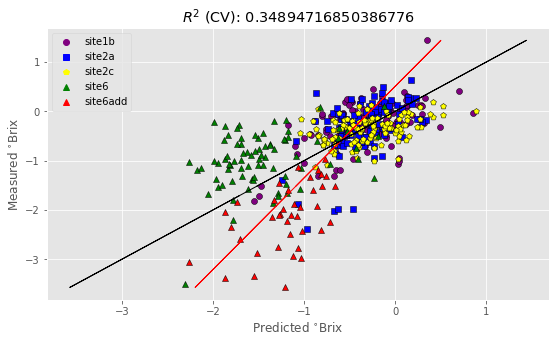

In [66]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
x1_ldmc_max = opt_Xc_ldmc_max[0:120,:]
x2_ldmc_max = opt_Xc_ldmc_max[120:240,:]
x3_ldmc_max = opt_Xc_ldmc_max[240:360,:]
x4_ldmc_max = opt_Xc_ldmc_max[360:440,:]

y1_ldmc_max = y_ldmc_max[0:120,:]
y2_ldmc_max = y_ldmc_max[120:240,:]
y3_ldmc_max = y_ldmc_max[240:360,:]
y4_ldmc_max = y_ldmc_max[360:440,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  260
Optimised MSEP  0.1626584339931408



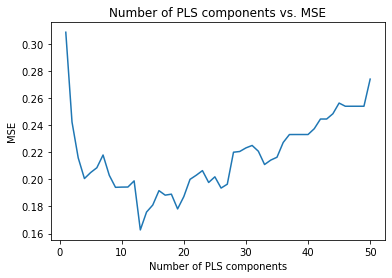

R2 calib: 0.772
R2 CV: 0.655
MSE calib: 0.111
MSE CV: 0.168
[0.54200548] [0.72953182]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [1.78130774] [1.5201289361700827 'ldmc_site1b_07_025.tif']
1 site1b [1.75930442] [1.2754248127541956 'ldmc_site1b_08_025.tif']
2 site1b [1.58508332] [1.8645102513869325 'ldmc_site1b_08_027.tif']
3 site1b [1.43549187] [1.2266318009533845 'ldmc_site1b_09_027.tif']
4 site1b [1.67673917] [1.475449624746486 'ldmc_site1b_10_028.tif']
5 site1b [2.02921828] [1.4709601916695718 'ldmc_site1b_10_031.tif']
6 site1b [1.84798611] [1.1936471030665097 'ldmc_site1b_13_038.tif']
7 site1b [1.929763] [1.9770241360087963 'ldmc_site1b_13_051.tif']
8 site1b [1.15850274] [1.212130258327961 'ldmc_site1b_14_037.tif']
9 site1b [1.68849788] [1.945536719581939 'ldmc_site1b_15_056.tif']
10 site1b [1.37560321] [1.2228921453636727 'ldmc_site1b_16_025.tif']
11 site1b [1.7532575] [2.0632587434046257 'ldmc_site1b_16_057.tif']
12 site1b [1.31691593] [1.1199683577939608 'ldmc_site1b_17_026.tif']
13 site1b [0.75342189] [1.1726070536281852 'ldmc_site1b_17_029.tif']
14 site1b [1.4887221] [1.4538368046948902 'ldmc_si

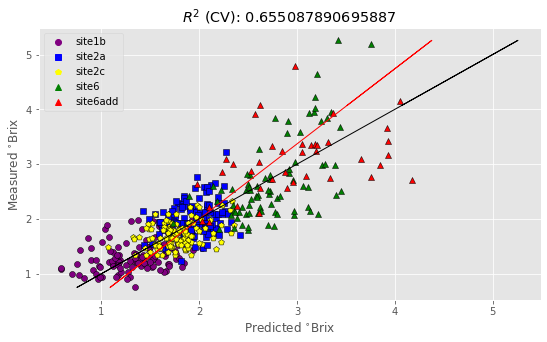

In [67]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

x1_ldmc_std = opt_Xc_ldmc_std[0:120,:]
x2_ldmc_std = opt_Xc_ldmc_std[120:240,:]
x3_ldmc_std = opt_Xc_ldmc_std[240:360,:]
x4_ldmc_std = opt_Xc_ldmc_std[360:440,:]

y1_ldmc_std = y_ldmc_std[0:120,:]
y2_ldmc_std = y_ldmc_std[120:240,:]
y3_ldmc_std = y_ldmc_std[240:360,:]
y4_ldmc_std = y_ldmc_std[360:440,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

# PN

In [ ]:
# pn_trait_pdf_ymax = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_ymax_pn.npy',  allow_pickle=True)
# pn_trait_pdf_std = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_std_pn.npy',  allow_pickle=True)

In [ ]:
# y_pn_max1 = np.array(pn_trait_pdf_ymax)

# y_pn_std1 = np.array(pn_trait_pdf_std)

In [ ]:
# site1b_y_pn_max1 = y_pn_max1[0:300, :]
# site2a_y_pn_max1 = y_pn_max1[300:600, :]
# site2c_y_pn_max1 = y_pn_max1[600:900,:]
# site6_y_pn_max1_1 = y_pn_max1[900:1193,:]
# # site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
# y_pn_max = np.vstack((site1b_y_pn_max1, site2a_y_pn_max1,site2c_y_pn_max1,site6_y_pn_max1_1))
# # site2c_x = x[]
# y_pn_max.shape

In [ ]:
# site1b_y_pn_std1 = y_pn_std1[0:300, :]
# site2a_y_pn_std1 = y_pn_std1[300:600, :]
# site2c_y_pn_std1 = y_pn_std1[600:900,:]
# site6_y_pn_std1_1 = y_pn_std1[900:1193,:]
# # site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
# y_pn_std = np.vstack((site1b_y_pn_std1, site2a_y_pn_std1,site2c_y_pn_std1,site6_y_pn_std1_1))
# # site2c_x = x[]
# y_pn_std.shape

In [ ]:
# opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 50)
# x1_pn_max = opt_Xc_pn_max[0:300,:]
# x2_pn_max = opt_Xc_pn_max[300:600,:]
# x3_pn_max = opt_Xc_pn_max[600:900,:]
# x4_pn_max = opt_Xc_pn_max[900:1193,:]

# y1_pn_max = y_pn_max[0:300,:]
# y2_pn_max = y_pn_max[300:600,:]
# y3_pn_max = y_pn_max[600:900,:]
# y4_pn_max = y_pn_max[900:1193,:]
# file_name_pn_max = 'E:/wenqu/model_csv_point/pn_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
#                              y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
#                              ncomp_pn_max, labels, file_name_pn_max)

In [ ]:
# opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 50)

# x1_pn_std = opt_Xc_pn_std[0:300,:]
# x2_pn_std = opt_Xc_pn_std[300:600,:]
# x3_pn_std = opt_Xc_pn_std[600:900,:]
# x4_pn_std = opt_Xc_pn_std[900:1193,:]

# y1_pn_std = y_pn_std[0:300,:]
# y2_pn_std = y_pn_std[300:600,:]
# y3_pn_std = y_pn_std[600:900,:]
# y4_pn_std = y_pn_std[900:1193,:]
# file_name_pn_std = 'E:/wenqu/model_csv_point/pn_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
#                              y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
#                              ncomp_pn_std, labels, file_name_pn_std)

# PC

In [68]:
pc_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training_add6\numpy\origin_std_pc.npy',  allow_pickle=True)

In [69]:
y_pc_max1 = np.array(pc_trait_pdf_ymax)

y_pc_std1 = np.array(pc_trait_pdf_std)

In [76]:
site1b_y_pc_max1 = y_pc_max1[0:120, :]
site2a_y_pc_max1 = y_pc_max1[120:240, :]
site2c_y_pc_max1 = y_pc_max1[240:360,:]
site6_y_pc_max1_1 = y_pc_max1[360:440,:]
site6_y_pn_max1_2 = y_pc_max1[441:480,:]
y_pc_max = np.vstack((site1b_y_pc_max1, site2a_y_pc_max1,site2c_y_pc_max1,site6_y_pc_max1_1, site6_y_pn_max1_2))
# site2c_x = x[]
y_pc_max.shape

(479, 2)

In [77]:
site1b_y_pc_std1 = y_pc_std1[0:120, :]
site2a_y_pc_std1 = y_pc_std1[120:240, :]
site2c_y_pc_std1 = y_pc_std1[240:360,:]
site6_y_pc_std1_1 = y_pc_std1[360:440,:]
site6_y_pn_std1_2 = y_pc_std1[441:480,:]
y_pc_std = np.vstack((site1b_y_pc_std1, site2a_y_pc_std1,site2c_y_pc_std1,site6_y_pc_std1_1, site6_y_pn_std1_2))
# site2c_x = x[]
y_pc_std.shape

(479, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  274
Optimised MSEP  0.004574408376144861



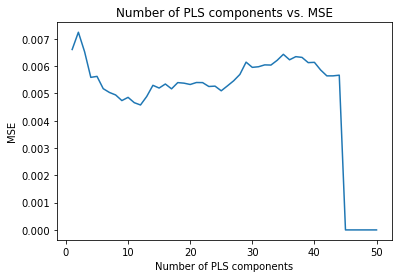

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [78]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
x1_pc_max = opt_Xc_pc_max[0:120,:]
x2_pc_max = opt_Xc_pc_max[120:240,:]
x3_pc_max = opt_Xc_pc_max[240:360,:]
x4_pc_max = opt_Xc_pc_max[360:480,:]

y1_pc_max = y_pc_max[0:120,:]
y2_pc_max = y_pc_max[120:240,:]
y3_pc_max = y_pc_max[240:360,:]
y4_pc_max = y_pc_max[360:480,:]


R2 calib: 0.484
R2 CV: 0.346
MSE calib: 0.004
MSE CV: 0.005
[2.32008454] [0.39353925]
None
0 site1b [3.75240526] [3.608662893583586 'pc_site1b_07_025.tif']
1 site1b [3.75142714] [3.5204006425133936 'pc_site1b_08_025.tif']
2 site1b [3.73500586] [3.6621545069926493 'pc_site1b_08_027.tif']
3 site1b [3.6886576] [3.63169129474743 'pc_site1b_09_027.tif']
4 site1b [3.69402399] [3.4805368799585716 'pc_site1b_10_028.tif']
5 site1b [3.71368109] [3.6913705583329914 'pc_site1b_10_031.tif']
6 site1b [3.76622615] [3.6827317816359146 'pc_site1b_13_038.tif']
7 site1b [3.78302351] [4.0120427684860305 'pc_site1b_13_051.tif']
8 site1b [3.67625653] [3.6776588473830736 'pc_site1b_14_037.tif']
9 site1b [3.72605723] [3.6140094323678538 'pc_site1b_15_056.tif']
10 site1b [3.84216973] [3.7568365673164466 'pc_site1b_16_025.tif']
11 site1b [3.80529222] [3.7346858312417797 'pc_site1b_16_057.tif']
12 site1b [3.7959495] [3.7887493392249367 'pc_site1b_17_026.tif']
13 site1b [3.74148277] [3.6749518569167314 'pc_site1b

433 site6 [3.87670014] [4.036827901462177 'pc_site6_54_012.tif']
434 site6 [3.98183836] [3.925773535166178 'pc_site6_55_008.tif']
435 site6 [3.97933315] [3.920085075023296 'pc_site6_55_009.tif']
436 site6 [3.94767712] [3.9457368888893165 'pc_site6_55_010.tif']
437 site6 [3.97419681] [3.9379228264003903 'pc_site6_56_008.tif']
438 site6 [3.93442643] [3.897252997836551 'pc_site6_56_009.tif']
439 site6 [3.95652966] [4.022233978764072 'pc_site6_56_010.tif']
440 site6add [3.92599132] [4.0100420831560015 'pc_site6add_11_031.tif']
441 site6add [3.84287999] [3.8964705801344253 'pc_site6add_12_029.tif']
442 site6add [3.84404478] [3.9421063424111367 'pc_site6add_12_030.tif']
443 site6add [3.82783374] [3.882776354884242 'pc_site6add_13_029.tif']
444 site6add [3.9655012] [3.895515434734814 'pc_site6add_14_028.tif']
445 site6add [3.8584474] [3.952574762376818 'pc_site6add_15_026.tif']
446 site6add [3.87995382] [3.8751026612740977 'pc_site6add_15_027.tif']
447 site6add [3.88315476] [3.965536504178434

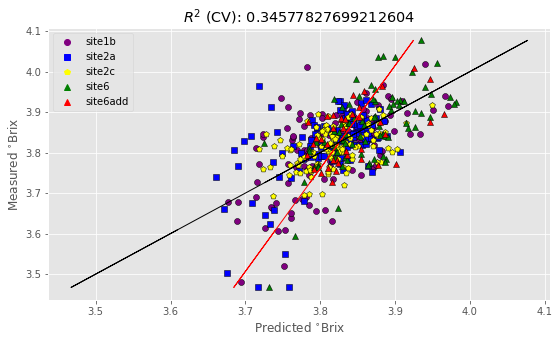

In [79]:
file_name_pc_max = 'E:/wenqu/model_csv_point/pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
                             y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(479, 319)
2% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(479, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  268
Optimised MSEP  0.009666979603019755



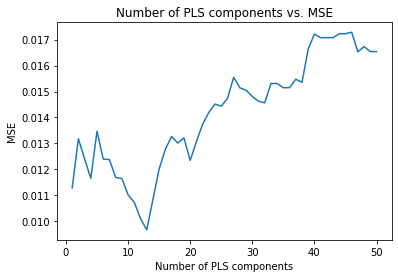

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.553
R2 CV: 0.321
MSE calib: 0.006
MSE CV: 0.008
[0.19943295] [0.43351725]
None
0 site1b [0.37215479] [0.26757431748885147 'pc_site1b_07_025.tif']
1 site1b [0.31552403] [0.2017594517990673 'pc_site1b_08_025.tif']
2 site1b [0.1710416] [0.26143389960045915 'pc_site1b_08_027.tif']
3 site1b [0.17621802] [0.18219778953831361 'pc_site1b_09_027.tif']
4 site1b [0.2603504] [0.212580966916666 'pc_site1b_10_028.tif']
5 site1b [0.25140922] [0.24854996246164476 'pc_site1b_10_031.tif']
6 site1b [0.29232497] [0.21786523440227748 'pc_site1b_13_038.tif']
7 site1b [0.24203689] [0.35999908451209356 'pc_site1b_13_051.tif']
8 site1b [0.2348169] [0.24501010056051953 'pc_site1b_14_037.tif']
9 site1b [0.32313193] [0.3244049432635283 'pc_site1b_15_056.tif']
10 site1b [0.24028002] [0.17035622429891775 'pc_site1b_16_025.tif']
11 site1b [0.36634731] [0.42498122388672427 'pc_site1b_16_057.tif']
12 site1b [0.27783626] [0.27470309408636867 'pc_site1b_17_026.tif']
13 site1b [0.20347151] [0.2389072990010818

417 site6 [0.42857886] [0.4966034031599644 'pc_site6_49_015.tif']
418 site6 [0.36283575] [0.36595982586950876 'pc_site6_49_016.tif']
419 site6 [0.45812748] [0.5324524535974158 'pc_site6_50_013.tif']
420 site6 [0.4513799] [0.657846003906821 'pc_site6_50_014.tif']
421 site6 [0.49061145] [0.793958416714517 'pc_site6_50_015.tif']
422 site6 [0.4394026] [0.5957895330768505 'pc_site6_51_012.tif']
423 site6 [0.39116586] [0.3312402298219494 'pc_site6_51_013.tif']
424 site6 [0.3397381] [0.38658328824353666 'pc_site6_51_014.tif']
425 site6 [0.31501625] [0.4384894818551838 'pc_site6_52_011.tif']
426 site6 [0.41281834] [0.4680747934723223 'pc_site6_52_012.tif']
427 site6 [0.35778135] [0.35543124963600314 'pc_site6_52_013.tif']
428 site6 [0.51181832] [0.44899883655795997 'pc_site6_53_010.tif']
429 site6 [0.56801418] [0.7278288415180213 'pc_site6_53_011.tif']
430 site6 [0.46451943] [0.4216016103027206 'pc_site6_54_009.tif']
431 site6 [0.46782466] [0.4793987552695284 'pc_site6_54_010.tif']
432 site6 [

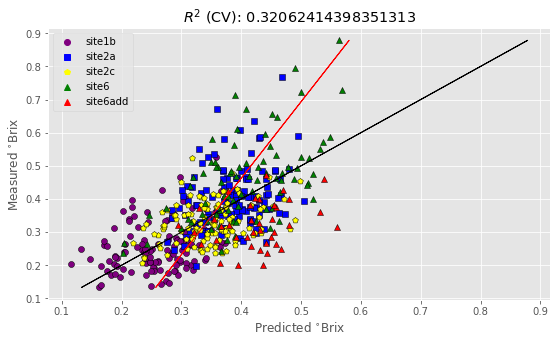

In [80]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

x1_pc_std = opt_Xc_pc_std[0:120,:]
x2_pc_std = opt_Xc_pc_std[120:240,:]
x3_pc_std = opt_Xc_pc_std[240:360,:]
x4_pc_std = opt_Xc_pc_std[360:480,:]

y1_pc_std = y_pc_std[0:120,:]
y2_pc_std = y_pc_std[120:240,:]
y3_pc_std = y_pc_std[240:360,:]
y4_pc_std = y_pc_std[360:480,:]
file_name_pc_std = 'E:/wenqu/model_csv_point/pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
                             y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)